In [2]:
from sas import SAS
import numpy as np
import math
import matplotlib.pyplot as plt

base = np.linspace(0,math.pi,40)
mat_b = np.array([[math.sin(x) for x in base],
                  [math.cos(x) for x in base],
                  [math.sinh(x) for x in base],
                  [math.cosh(x) for x in base],
                  base])
mat_a = np.random.rand(2000,5)
complete_dat = np.dot(mat_a,mat_b)+np.random.rand(2000,40)
test_dat = complete_dat.copy()
test_dat.ravel()[np.random.choice(test_dat.size,16000,replace=False)]=np.nan

recover = SAS(thres=0.00001,rank = 5)
sasres_a, sasres_b = recover.fit(test_dat,complete_dat,True)

sasres = np.dot(sasres_a.transpose(),sasres_b)
print('MAE of estimation:',np.mean(abs(sasres-complete_dat)[np.isnan(test_dat)]))

Training Error: .....  1.27250474974
Testing Error: ......  1.63056039622
Finished Iteration No.  1
Training Error: .....  0.292493124981
Testing Error: ......  0.387434601467
Finished Iteration No.  2
Training Error: .....  0.232586030731
Testing Error: ......  0.288807619338
Finished Iteration No.  3
Training Error: .....  0.225036433301
Testing Error: ......  0.271585139162
Finished Iteration No.  4
Training Error: .....  0.224469914669
Testing Error: ......  0.269583551815
Finished Iteration No.  5
Training Error: .....  0.22419869179
Testing Error: ......  0.268081396169
Finished Iteration No.  6
Training Error: .....  0.223932408996
Testing Error: ......  0.266813189729
Finished Iteration No.  7
Training Error: .....  0.223689230869
Testing Error: ......  0.266017360501
Finished Iteration No.  8
Training Error: .....  0.223475739097
Testing Error: ......  0.265638428894
Finished Iteration No.  9
Training Error: .....  0.223317464917
Testing Error: ......  0.265457573722
Finished 

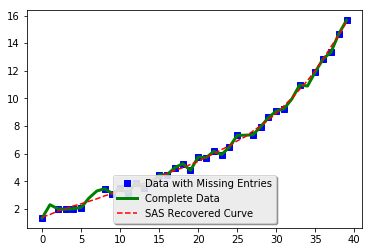

In [3]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(test_dat[0],'bs',label = 'Data with Missing Entries')
plt.plot(complete_dat[0],'g',label = 'Complete Data',linewidth = 3.0)
plt.plot(sasres[0],'r--', label = 'SAS Recovered Curve')
ax.legend(loc='lower center', shadow=True)
plt.show()